In [10]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.font_manager as font_manager
import bisect
font = font_manager.FontProperties(family=['Arial', 'LiHei Pro'],
                                   style='normal', size=12)
plt.style.use("seaborn-v0_8") # beautiful!

In [34]:
def random_chord_by_two_points():
    t1 = np.random.uniform(0.0, 2*np.pi)
    t2 = np.random.uniform(0.0, 2*np.pi)
    p1 = np.array([np.cos(t1), np.sin(t1)])
    p2 = np.array([np.cos(t2), np.sin(t2)])
    return np.linalg.norm(p2-p1, ord=2)

def random_chord_by_random_radius():
    r = np.random.uniform(0.0, 1.0)
    return 2 * np.sqrt(1 - r*r)

def random_chord_by_inner_point():
    r = np.random.uniform(0.0, 1.0)
    return 2 * np.sqrt(1 - r)

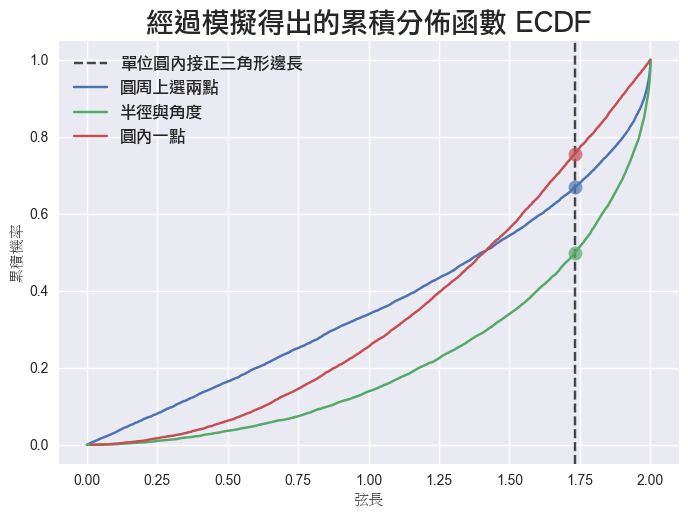

In [51]:
x0 = np.sqrt(3)
plt.axvline(x = x0, color = 'k', alpha=0.7, linestyle='dashed', label = '單位圓內接正三角形邊長')
ax = plt.gca()

N = 10000
ys = np.linspace(0, 1, N+1)[1:]
arr1 = [random_chord_by_two_points() for _ in range(N)]
arr1.sort()
y1 = bisect.bisect_left(arr1, np.sqrt(3)) / N
color = next(ax._get_lines.prop_cycler)['color']
plt.plot(arr1, ys, label='圓周上選兩點', color=color)
plt.plot(x0, y1, marker='o', linestyle='none', alpha=0.7, markersize=10, color=color)

arr2 = [random_chord_by_random_radius() for _ in range(N)]
arr2.sort()
y2 = bisect.bisect_left(arr2, np.sqrt(3)) / N
color = next(ax._get_lines.prop_cycler)['color']
plt.plot(arr2, ys, label='半徑與角度', color=color)
plt.plot(x0, y2, marker='o', linestyle='none', alpha=0.7, markersize=10, color=color)

arr3 = [random_chord_by_inner_point() for _ in range(N)]
arr3.sort()
y3 = bisect.bisect_left(arr3, np.sqrt(3)) / N
color = next(ax._get_lines.prop_cycler)['color']
plt.plot(arr3, ys, label='圓內一點', color=color)
plt.plot(x0, y3, marker='o', linestyle='none', alpha=0.7, markersize=10, color=color)

plt.title('經過模擬得出的累積分佈函數 ECDF', fontname='LiHei Pro', fontsize=20)
plt.legend(loc='upper left', prop=font)
plt.xlabel('弦長', fontname='LiSong Pro')
plt.ylabel('累積機率', fontname='LiSong Pro')
plt.show()